In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np

Steps 
* Showing Missing Values
* Showing the skewness
* Handling the missing values by filling them with month average
* Showing the Outliers using Boxplot 
* Removing the Outliers with iqr 5% and 95% 
* Filling the removed outliers with month average again
* Showing the Outliers using Boxplot 
* Showing the skewness again
* Showing the rekations, heatmap, coorelation.

In [2]:
df = pd.read_csv('../../data/raw/airport_june_2019_empty.csv')
df.drop("To Date", axis=1, inplace=True)
df.head()

,From Date,PM2.5,PM10,NO,NO2,SO2,CO,Ozone,RH,WS,WD,AT
0,01-06-2019 00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01-06-2019 01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01-06-2019 02:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01-06-2019 03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01-06-2019 04:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# sns.histplot(data=df, x='PM10', kde=True)
# plt.show()

In [4]:
# Plot line plot to visualize trend/pattern
# sns.lineplot(data=df, x='From Date', y='PM10')
# plt.show()

In [5]:
df.head()

,From Date,PM2.5,PM10,NO,NO2,SO2,CO,Ozone,RH,WS,WD,AT
0,01-06-2019 00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01-06-2019 01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01-06-2019 02:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01-06-2019 03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01-06-2019 04:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33671 entries, 0 to 33670
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   From Date  33671 non-null  object 
 1   PM2.5      30600 non-null  float64
 2   PM10       31367 non-null  float64
 3   NO         30568 non-null  float64
 4   NO2        29663 non-null  float64
 5   SO2        31690 non-null  float64
 6   CO         31319 non-null  float64
 7   Ozone      31766 non-null  float64
 8   RH         30442 non-null  float64
 9   WS         30440 non-null  float64
 10  WD         30442 non-null  float64
 11  AT         30387 non-null  float64
dtypes: float64(11), object(1)
memory usage: 3.1+ MB


In [7]:
df.dtypes

From Date     object
PM2.5        float64
PM10         float64
NO           float64
NO2          float64
SO2          float64
CO           float64
Ozone        float64
RH           float64
WS           float64
WD           float64
AT           float64
dtype: object

In [8]:
# Check Missing Values
df.isna().sum()

From Date       0
PM2.5        3071
PM10         2304
NO           3103
NO2          4008
SO2          1981
CO           2352
Ozone        1905
RH           3229
WS           3231
WD           3229
AT           3284
dtype: int64

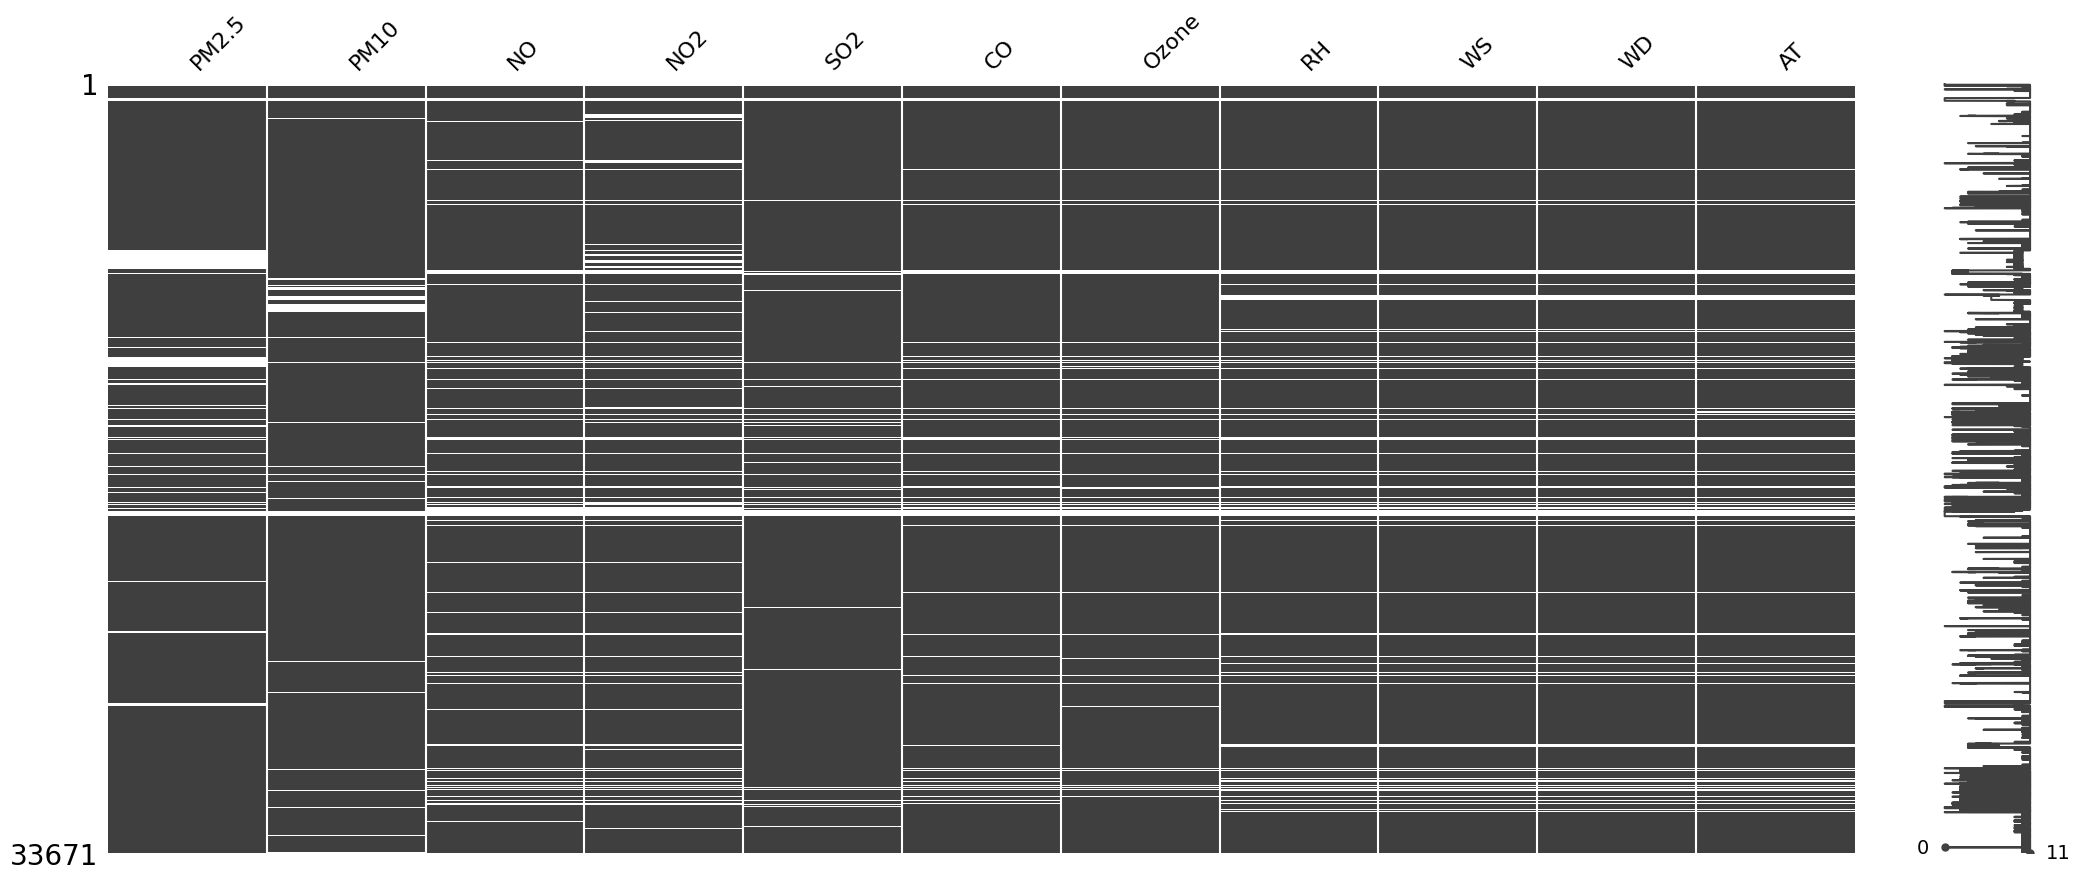

In [9]:

# Visualize the missingness 
msno.matrix(df.iloc[:,1:])
plt.show()

<AxesSubplot:>

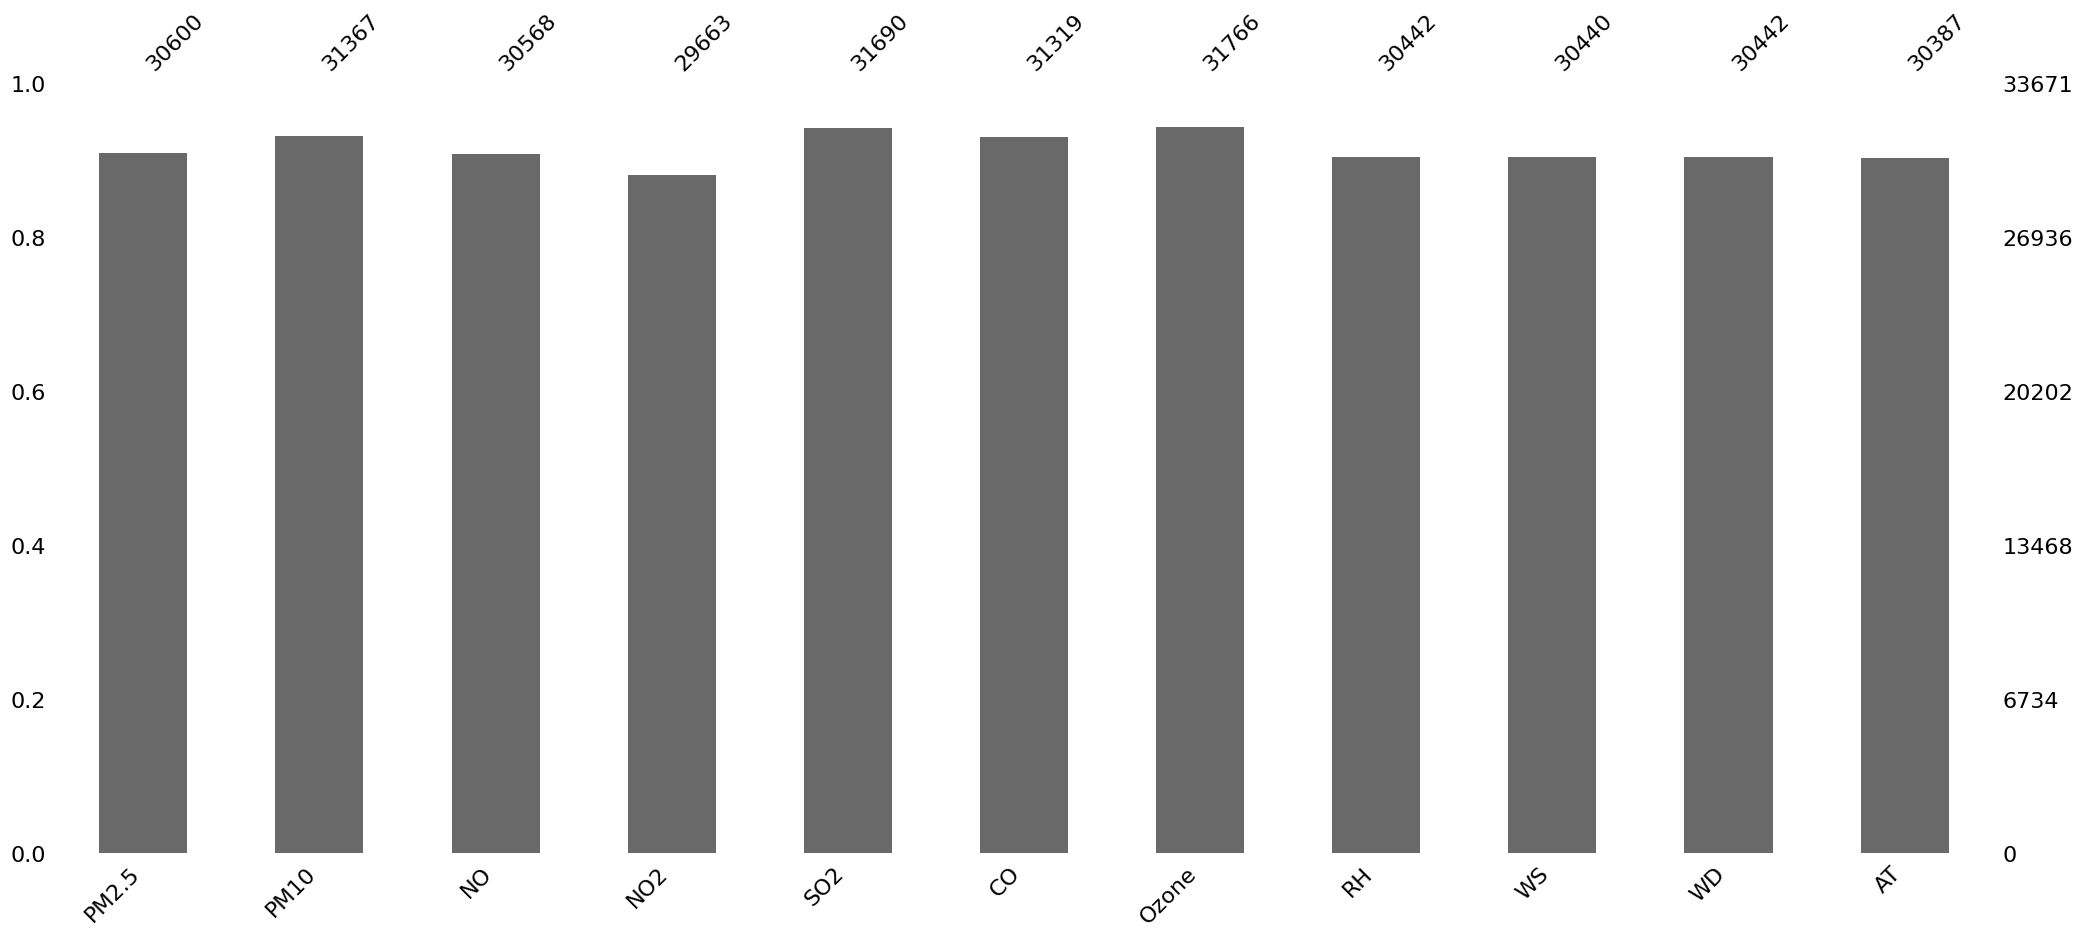

In [10]:
msno.bar(df.iloc[:,1:])

In [11]:
df.describe()

,PM2.5,PM10,NO,NO2,SO2,CO,Ozone,RH,WS,WD,AT
count,30600.000000,31367.000000,30568.000000,29663.000000,31690.000000,31319.000000,31766.000000,30442.000000,30440.000000,30442.000000,30387.000000
mean,39.746611,131.552159,66.385754,29.348466,10.215711,0.967928,21.833122,72.424411,0.907074,218.825493,28.375965
std,32.314145,94.746321,44.754709,24.437130,7.472883,0.709635,25.433573,17.469416,0.584814,61.716571,3.509329
min,0.030000,0.200000,0.010000,0.010000,0.010000,0.000000,0.010000,16.930000,0.190000,1.570000,16.470000
25%,16.000000,57.230000,34.570000,12.035000,5.850000,0.360000,6.090000,60.660000,0.530000,160.552500,26.030000
50%,31.000000,110.780000,57.890000,23.150000,8.860000,0.820000,14.480000,75.020000,0.800000,226.295000,28.000000
75%,56.970000,186.985000,87.940000,39.400000,12.880000,1.480000,25.460000,86.120000,1.130000,276.147500,30.600000
max,990.000000,995.000000,496.790000,223.120000,160.220000,7.670000,199.780000,99.950000,17.410000,330.290000,41.660000


C:\Users\HP\AppData\Local\Temp\ipykernel_9320\4017777084.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  display(df.skew())


PM2.5    4.382813
PM10     1.953127
NO       1.681563
NO2      1.627622
SO2      2.983214
CO       0.836074
Ozone    2.767051
RH      -0.516197
WS       4.767622
WD      -0.248743
AT       0.176256
dtype: float64

<AxesSubplot:xlabel='PM10', ylabel='Count'>

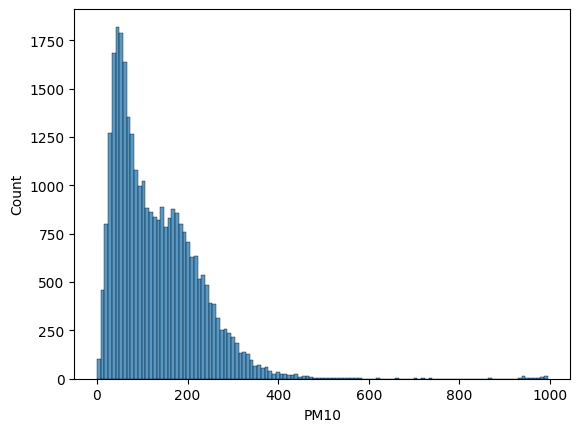

In [12]:
display(df.skew())

# Plot a histogram of the data
display(sns.histplot(df['PM10'], kde=False))


In [13]:
print(df['From Date'].head())

0    01-06-2019 00:00
1    01-06-2019 01:00
2    01-06-2019 02:00
3    01-06-2019 03:00
4    01-06-2019 04:00
Name: From Date, dtype: object


In [14]:
# Fill NaN values with monthly average of particular hour
#Split hour from time into new column
df['HOUR']=df['From Date'].apply(lambda x: int(x.split(' ')[1][:2]))
df.HOUR.head()

0    0
1    1
2    2
3    3
4    4
Name: HOUR, dtype: int64

In [15]:
df['From Date'] = pd.to_datetime(df['From Date'], format = '%d-%m-%Y %H:%M')
df['From Date']

0       2019-06-01 00:00:00
1       2019-06-01 01:00:00
2       2019-06-01 02:00:00
3       2019-06-01 03:00:00
4       2019-06-01 04:00:00
                ...        
33666   2023-04-03 18:00:00
33667   2023-04-03 19:00:00
33668   2023-04-03 20:00:00
33669   2023-04-03 21:00:00
33670   2023-04-03 22:00:00
Name: From Date, Length: 33671, dtype: datetime64[ns]

In [16]:
print('Count of missing values:\n',df.shape[0]-df.count())

Count of missing values:
 From Date       0
PM2.5        3071
PM10         2304
NO           3103
NO2          4008
SO2          1981
CO           2352
Ozone        1905
RH           3229
WS           3231
WD           3229
AT           3284
HOUR            0
dtype: int64


In [17]:
df.set_index('From Date',inplace=True)

In [18]:
df['MONTH']=df.index.month     #Create month column (Run once)
df.reset_index(inplace=True)

In [19]:
df.head()

,From Date,PM2.5,PM10,NO,NO2,SO2,CO,Ozone,RH,WS,WD,AT,HOUR,MONTH
0,2019-06-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,6
1,2019-06-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,6
2,2019-06-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,6
3,2019-06-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,6
4,2019-06-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,6


In [20]:
df['PM10']=df['PM10'].fillna(df.groupby(['MONTH','HOUR'])['PM10'].transform('mean'))
df['PM2.5']=df['PM2.5'].fillna(df.groupby(['MONTH','HOUR'])['PM2.5'].transform('mean'))
df['NO2']=df['NO2'].fillna(df.groupby(['MONTH','HOUR'])['NO2'].transform('mean'))
df['NO']=df['NO'].fillna(df.groupby(['MONTH','HOUR'])['NO'].transform('mean'))
df['SO2']=df['SO2'].fillna(df.groupby(['MONTH','HOUR'])['SO2'].transform('mean'))
df['CO']=df['CO'].fillna(df.groupby(['MONTH','HOUR'])['CO'].transform('mean'))
df['Ozone']=df['Ozone'].fillna(df.groupby(['MONTH','HOUR'])['Ozone'].transform('mean'))
df['RH']=df['RH'].fillna(df.groupby(['MONTH','HOUR'])['RH'].transform('mean'))
df['WS']=df['WS'].fillna(df.groupby(['MONTH','HOUR'])['WS'].transform('mean'))
df['WD']=df['WD'].fillna(df.groupby(['MONTH','HOUR'])['WD'].transform('mean'))
df['AT']=df['AT'].fillna(df.groupby(['MONTH','HOUR'])['AT'].transform('mean'))

# or Directly filling it with mean
# from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
# dataset=df.copy()
# imputer = imputer.fit(dataset.iloc[:, 2:].values)
# dataset.iloc[:,2:] = imputer.transform(dataset.iloc[:, 2:].values)
# dataset.info()
# df.info()
# dataset.head()

In [21]:
print('Count of missing values:\n',df.shape[0]-df.count())

Count of missing values:
 From Date    0
PM2.5        0
PM10         0
NO           0
NO2          0
SO2          0
CO           0
Ozone        0
RH           0
WS           0
WD           0
AT           0
HOUR         0
MONTH        0
dtype: int64


<AxesSubplot:>

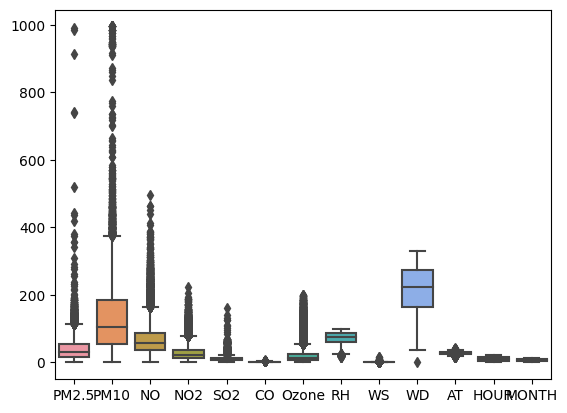

In [22]:
# Plot a box plot of the data
sns.boxplot(data=df)

In [23]:
# Compute the first and third quartiles (Q1 and Q3)
Q1 = df.iloc[:, 1:12].quantile(0.05)
Q3 = df.iloc[:, 1:12].quantile(0.95)

# Compute the interquartile range (IQR)
IQR = Q3 - Q1

# Define the upper and lower bounds
upper = Q3 + 1.5 * IQR
lower = Q1 - 1.5 * IQR

# Replace the outliers with NaN values
df.iloc[:, 1:12] = df.iloc[:, 1:12][(df.iloc[:, 1:12] >= lower) & (df.iloc[:, 1:12] <= upper)]

# Fill missing values using interpolation
# df.iloc[:, 1:12] = df.iloc[:, 1:12].interpolate(method='linear', limit_direction='both')

In [24]:
df['PM10']=df['PM10'].fillna(df.groupby(['MONTH','HOUR'])['PM10'].transform('mean'))
df['PM2.5']=df['PM2.5'].fillna(df.groupby(['MONTH','HOUR'])['PM2.5'].transform('mean'))
df['NO2']=df['NO2'].fillna(df.groupby(['MONTH','HOUR'])['NO2'].transform('mean'))
df['NO']=df['NO'].fillna(df.groupby(['MONTH','HOUR'])['NO'].transform('mean'))
df['SO2']=df['SO2'].fillna(df.groupby(['MONTH','HOUR'])['SO2'].transform('mean'))
df['CO']=df['CO'].fillna(df.groupby(['MONTH','HOUR'])['CO'].transform('mean'))
df['Ozone']=df['Ozone'].fillna(df.groupby(['MONTH','HOUR'])['Ozone'].transform('mean'))
df['RH']=df['RH'].fillna(df.groupby(['MONTH','HOUR'])['RH'].transform('mean'))
df['WS']=df['WS'].fillna(df.groupby(['MONTH','HOUR'])['WS'].transform('mean'))
df['WD']=df['WD'].fillna(df.groupby(['MONTH','HOUR'])['WD'].transform('mean'))
df['AT']=df['AT'].fillna(df.groupby(['MONTH','HOUR'])['AT'].transform('mean'))

<AxesSubplot:>

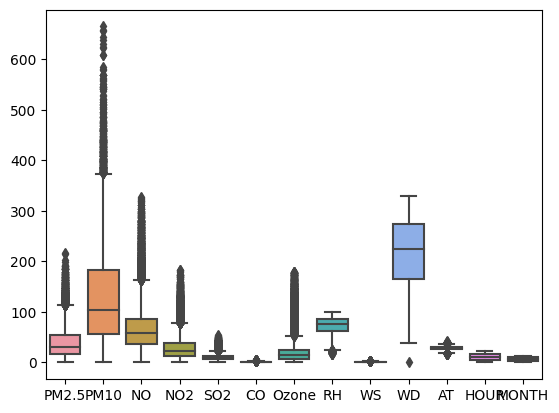

In [25]:
# Plot a box plot of the data
sns.boxplot(data=df)

In [26]:
print('Count of missing values:\n',df.shape[0]-df.count())

Count of missing values:
 From Date    0
PM2.5        0
PM10         0
NO           0
NO2          0
SO2          0
CO           0
Ozone        0
RH           0
WS           0
WD           0
AT           0
HOUR         0
MONTH        0
dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_9320\663935864.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  display(df.skew())


PM2.5    1.221897
PM10     1.029309
NO       1.466009
NO2      1.611543
SO2      1.650291
CO       0.829973
Ozone    2.688000
RH      -0.551609
WS       1.627017
WD      -0.241632
AT       0.173133
HOUR     0.000012
MONTH   -0.070892
dtype: float64

<AxesSubplot:xlabel='PM10', ylabel='Count'>

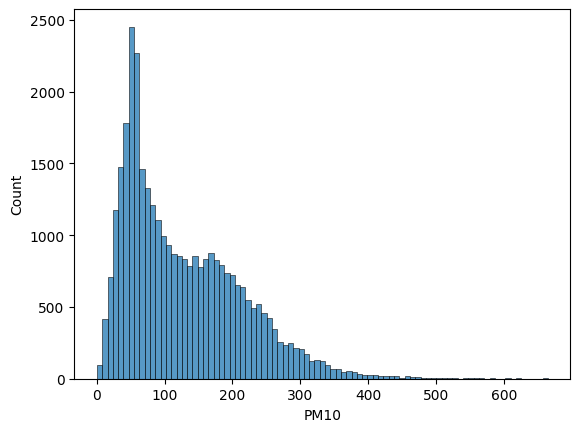

In [27]:
# Checking the skewness again
display(df.skew())

# Plot a histogram of the data
display(sns.histplot(df['PM10'], kde=False))

In [28]:
df.to_csv('../../data/processed/airport_june_2019.csv', index=False)

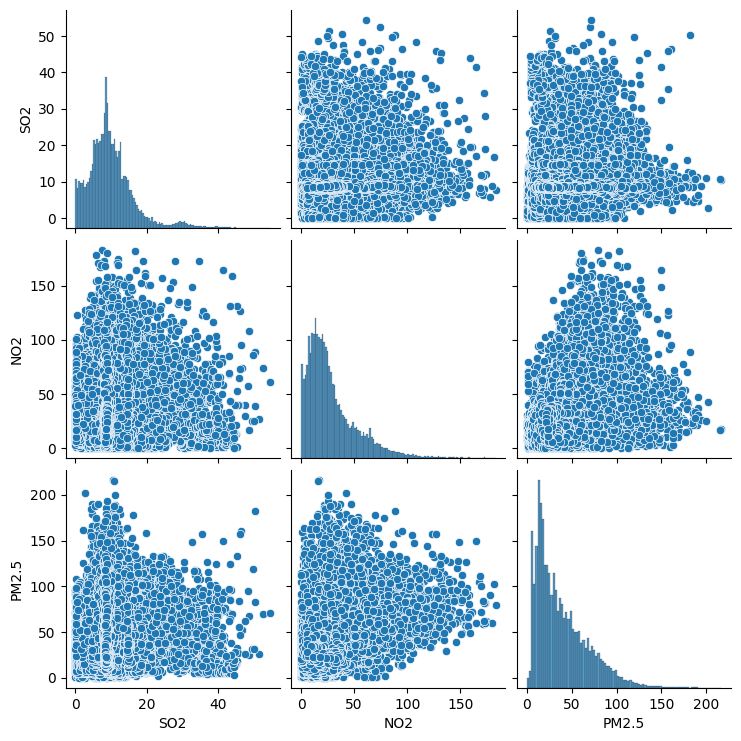

In [28]:
sns.pairplot(df[['SO2','NO2','PM2.5']])

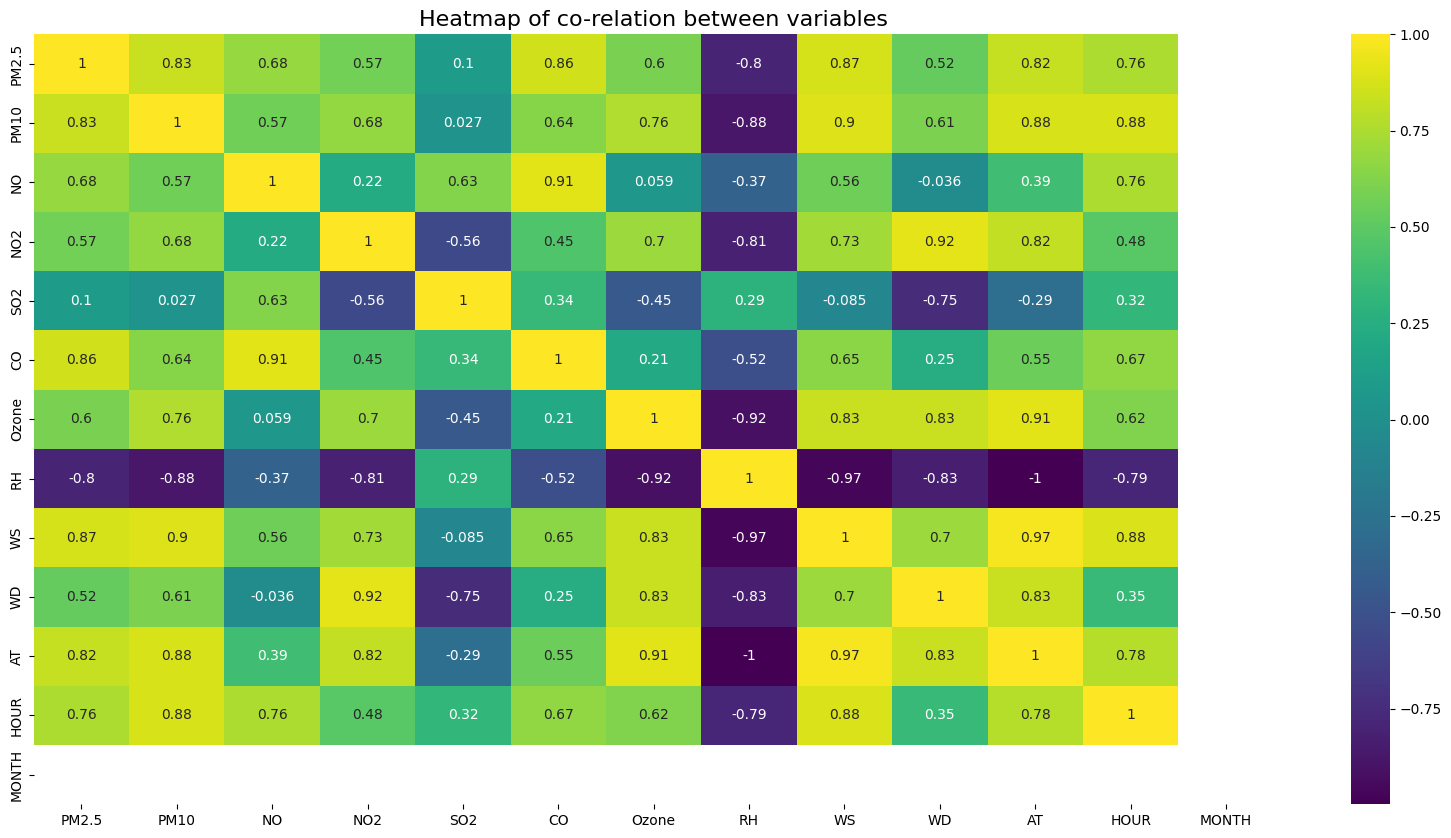

In [29]:
#Use heatmap to see corelation between variables
plt.figure(figsize=(20,10))

sns.heatmap(df.iloc[1:11].corr(),annot=True,cmap='viridis')
plt.title('Heatmap of co-relation between variables',fontsize=16)
plt.show()

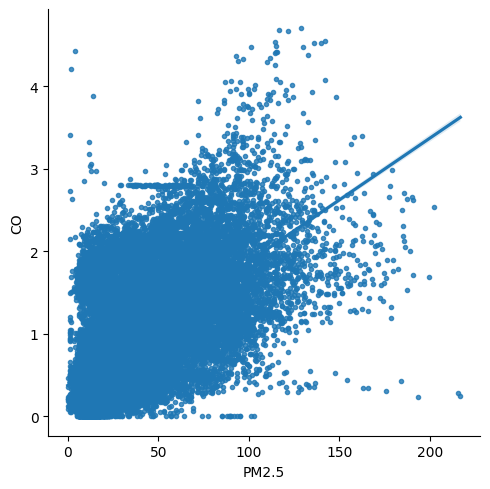

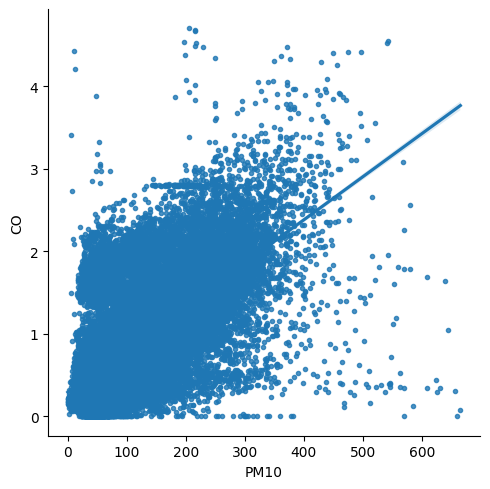

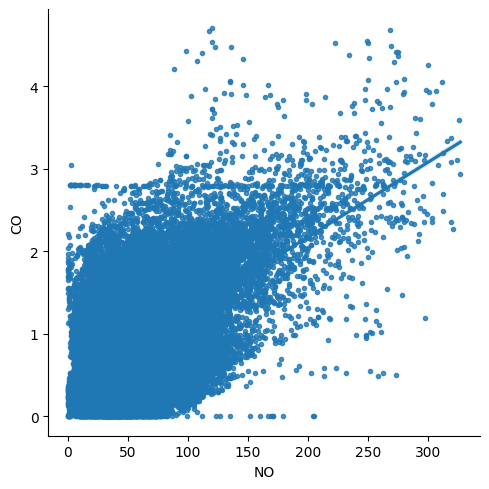

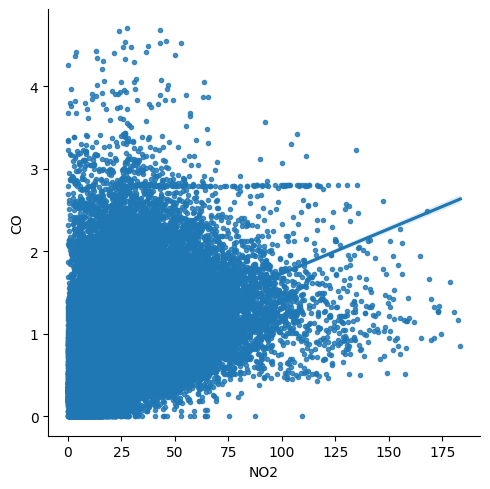

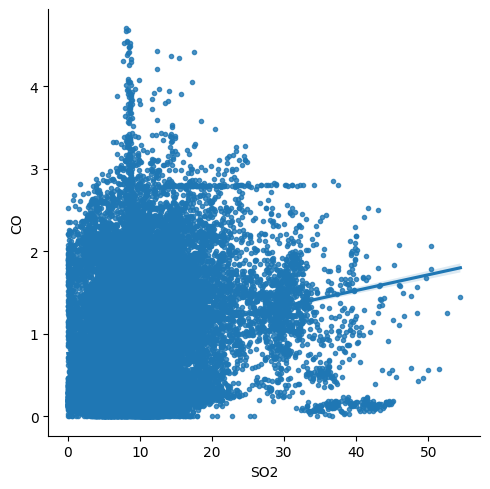

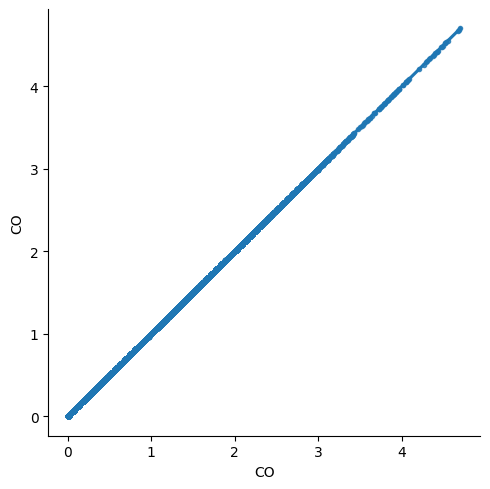

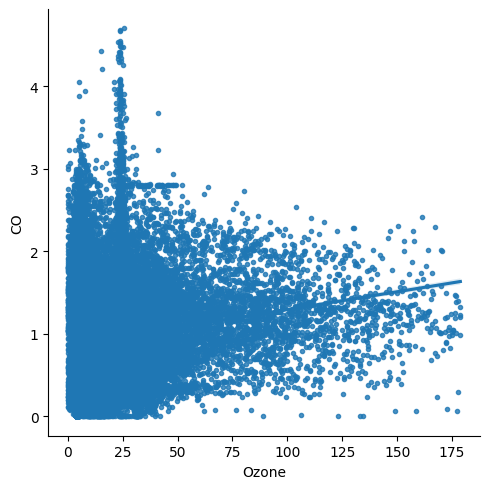

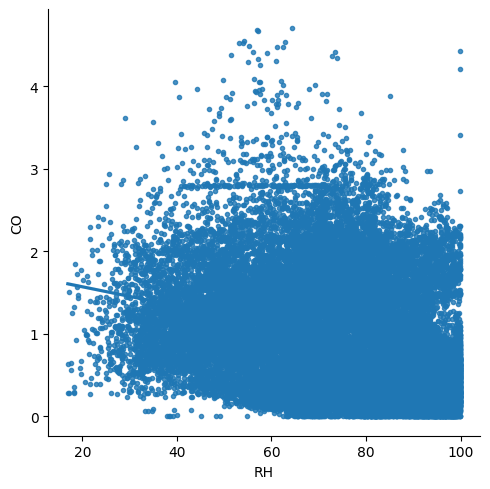

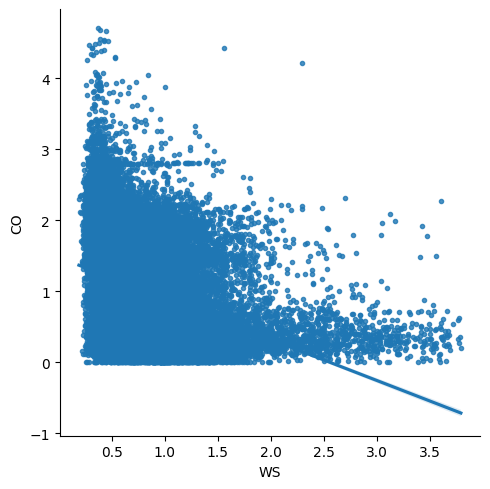

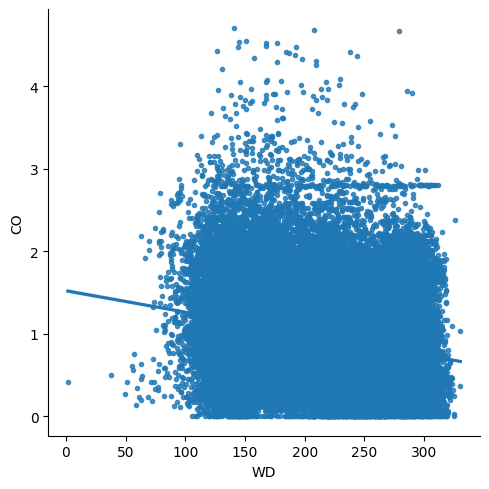

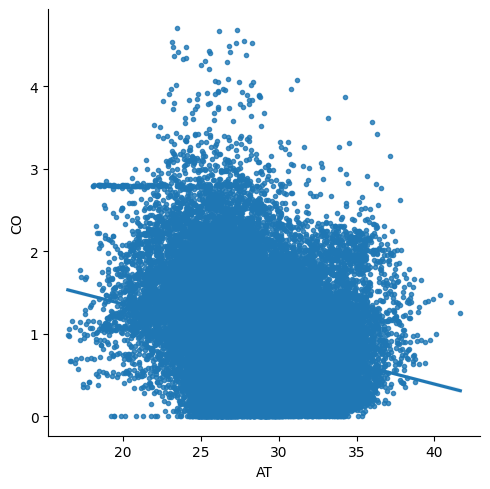

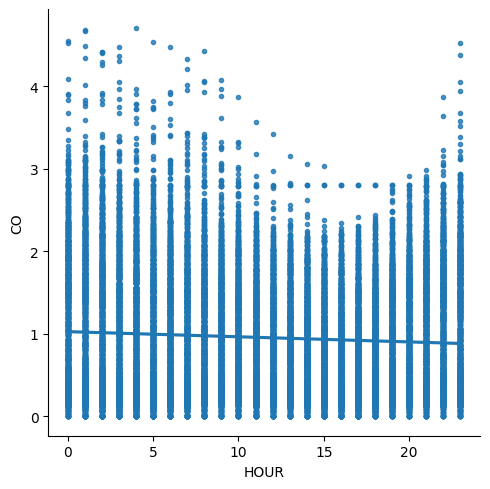

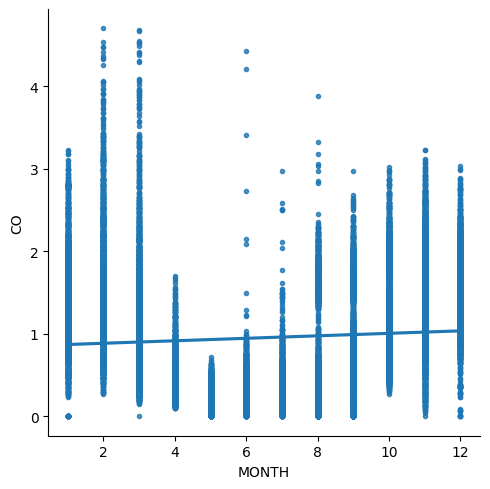

In [30]:
#plot all X-features against output variable RH
col_=df.columns.tolist()[1:]
for i in df.columns.tolist()[1:]:
    sns.lmplot(x=i,y='CO',data=df,markers='.')

In [31]:
from sklearn.preprocessing import StandardScaler         #import normalisation package
from sklearn.model_selection import train_test_split      #import train test split
from sklearn.linear_model import LinearRegression         #import linear regression package
from sklearn.metrics import mean_squared_error,mean_absolute_error   #import mean squared error and mean absolute error

In [32]:
col_=df.columns.tolist()[1:8]
X=df[col_].drop('PM2.5',axis=1)     #X-input features
y=df['PM2.5']                    #y-input features

In [ ]:
# X=df[col_].drop('PM2.5',axis=1) 
# y=df['PM2.5']  
# ss=StandardScaler()
# X_std=ss.fit_transform(X)
# X_train, X_test, y_train, y_test=train_test_split(X_std,y,test_size=0.3, random_state=42)
# lr=LinearRegression()
# lr_model=lr.fit(X_train,y_train)  
# y_pred=lr_model.predict(X_test)                      #predict using the model
# rmse=np.sqrt(mean_squared_error(y_test,y_pred))      #calculate rmse
# print('Baseline RMSE of model:',rmse)

In [33]:
ss=StandardScaler()
X_std=ss.fit_transform(X)
X_train, X_test, y_train, y_test=train_test_split(X_std,y,test_size=0.3, random_state=42)
print('Training data size:',X_train.shape)
print('Test data size:',X_test.shape)

In [37]:
df.isnull().sum()

From Date    0
PM2.5        0
PM10         0
NO           0
NO2          0
SO2          0
CO           0
Ozone        0
RH           0
WS           0
WD           0
AT           0
HOUR         0
MONTH        0
dtype: int64

In [38]:
lr=LinearRegression()
lr_model=lr.fit(X_train,y_train)          #fit the linear model on train data

In [39]:
print('Intercept:',lr_model.intercept_)
print('--------------------------------')
print('Slope:')
list(zip(X.columns.tolist(),lr_model.coef_))

Intercept: 38.655133303776516
--------------------------------
Slope:


[('PM10', 22.632792914960643),
 ('NO', 0.8291515644135456),
 ('NO2', 2.7776693491895283),
 ('SO2', -1.174440626966847),
 ('CO', 2.031339732042654),
 ('Ozone', -1.5209043864342915)]

In [40]:
y_pred=lr_model.predict(X_test)                      #predict using the model
rmse=np.sqrt(mean_squared_error(y_test,y_pred))      #calculate rmse
print('Baseline RMSE of model:',rmse)

Baseline RMSE of model: 13.743829111068614


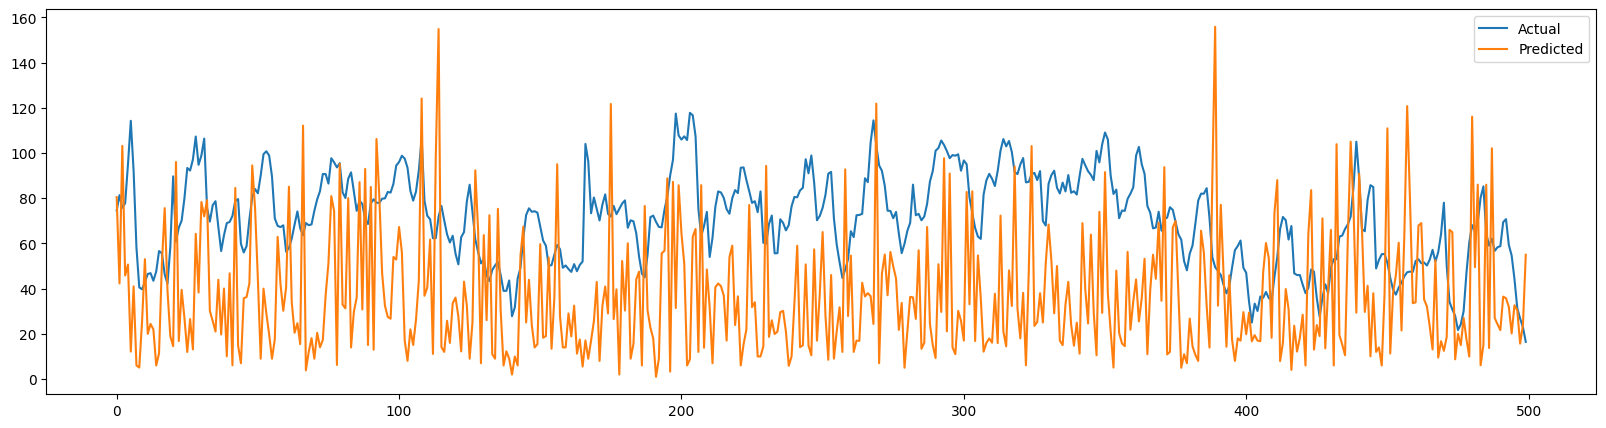

In [72]:
# # Plot predicted vs true values
# plt.scatter(y_test, y_pred)
# plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
# plt.xlabel('True values')
# plt.ylabel('Predicted values')
# plt.show()
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
plt.plot(df['PM2.5'].values[30500:31000], label='Actual')
plt.plot(np.concatenate([y_train, y_test])[30500:31000], label='Predicted')
plt.legend()
plt.show()

In [41]:
# write function to measure RMSE
def train_test_RMSE(feature):
    X=df[feature]
    y=df['RH']
    X_std_one=ss.fit_transform(X)
    X_trainR,X_testR,y_trainR,y_testR=train_test_split(X_std_one,y,test_size=0.3,random_state=42)
    lr_model_one=lr.fit(X_trainR,y_trainR)
    y_predR=lr_model_one.predict(X_testR)
    return np.sqrt(mean_squared_error(y_testR,y_predR))
# print 10 number


In [42]:
col_.remove('PM2.5')        #remove output
col_

['PM10', 'NO', 'NO2', 'SO2', 'CO', 'Ozone']

In [43]:
print('List of features:',col_)    #print list of features


List of features: ['PM10', 'NO', 'NO2', 'SO2', 'CO', 'Ozone']


In [44]:
print('RMSE with Features as',col_[0:2],train_test_RMSE(col_[0:2]))
print('-------------------------')
print('RMSE with Features as',col_[0:6],train_test_RMSE(col_[0:6]))
# print('-------------------------')
# print('RMSE with Features as',col_[0:9],train_test_RMSE(col_[0:9]))
# print('-------------------------')
# print('RMSE with Features as',col_[1:5],train_test_RMSE(col_[2:9]))
# print('-------------------------')
# print('RMSE with Features as',col_[0:11],train_test_RMSE(col_[0:11]))
# print('-------------------------')
# print('RMSE with Features as',col_[1:12],train_test_RMSE(col_[1:12]))
# print('-------------------------')
# print('RMSE with Features as',col_[0:13],train_test_RMSE(col_[0:13]))

RMSE with Features as ['PM10', 'NO'] 14.162099853777915
-------------------------
RMSE with Features as ['PM10', 'NO', 'NO2', 'SO2', 'CO', 'Ozone'] 11.930992043625501


In [45]:
from sklearn.tree import DecisionTreeRegressor         #Decision tree regression model
from sklearn.model_selection import cross_val_score    #import cross validation score package
from sklearn.model_selection import GridSearchCV        #import grid search cv
dt_one_reg=DecisionTreeRegressor()

In [46]:
dt_model=dt_one_reg.fit(X_train,y_train)         #fit the model
y_pred_dtone=dt_model.predict(X_test)            #predict

In [47]:
#calculate RMSE
print('RMSE of Decision Tree Regression:',np.sqrt(mean_squared_error(y_pred_dtone,y_test)))

RMSE of Decision Tree Regression: 15.799418147854942


In [48]:
from sklearn.ensemble import RandomForestRegressor           #import random forest regressor
rf_reg=RandomForestRegressor()

In [49]:
rf_model=rf_reg.fit(X_train,y_train)         #fit model   
y_pred_rf=rf_model.predict(X_test)           #predict

In [50]:
#Calculate RMSE
print('RMSE of predicted RH in RF model:',np.sqrt(mean_squared_error(y_test,y_pred_rf)))

RMSE of predicted RH in RF model: 10.947672231827772


In [51]:
#define rf parameters
rf_params={'n_estimators':[10,20],'max_depth':[8,10],'max_leaf_nodes':[70,90]}
#define rf grid search
rf_grid=GridSearchCV(rf_reg,rf_params,cv=10)

In [52]:
rf_model_two=rf_grid.fit(X_train,y_train)     #fit the model wtih all grid parameters

In [53]:
y_pred_rf_two=rf_model_two.predict(X_test)        #predict

In [54]:
#Calculate RMSE
print('RMSE using RF grid search method',np.sqrt(mean_squared_error(y_test,y_pred_rf_two)))  

RMSE using RF grid search method 11.933834538196562


In [55]:
from sklearn.svm import SVR           #import support vector regressor
sv_reg=SVR()

In [56]:
sv_model=sv_reg.fit(X_train,y_train)    #train the model

In [57]:
y_pred_sv=sv_model.predict(X_test)         #predict

In [58]:
#Calculate RMSE of SVR
print('RMSE of SVR model:',np.sqrt(mean_squared_error(y_test,y_pred_sv)))

RMSE of SVR model: 12.776019645750083


In [59]:
print('RMSE with Features as',col_[0:2],train_test_RMSE(col_[0:2]))
print('-------------------------')
print('RMSE with Features as',col_[0:6],train_test_RMSE(col_[0:6]))
print('RMSE of Decision Tree Regression:',np.sqrt(mean_squared_error(y_pred_dtone,y_test)))
print('RMSE of predicted RH in RF model:',np.sqrt(mean_squared_error(y_test,y_pred_rf)))
print('RMSE using RF grid search method',np.sqrt(mean_squared_error(y_test,y_pred_rf_two)))  
print('RMSE of SVR model:',np.sqrt(mean_squared_error(y_test,y_pred_sv)))

RMSE with Features as ['PM10', 'NO'] 14.162099853777915
-------------------------
RMSE with Features as ['PM10', 'NO', 'NO2', 'SO2', 'CO', 'Ozone'] 11.930992043625501
RMSE of Decision Tree Regression: 15.799418147854942
RMSE of predicted RH in RF model: 10.947672231827772
RMSE using RF grid search method 11.933834538196562
RMSE of SVR model: 12.776019645750083
